In [1]:
import csv
import statistics
import cmath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def readstroopsampledata(filename):
    '''
      Reads the stoop data file and stores the congruent and non congruent data in two seperate lists
    '''
    with open(filename,"r") as f:
        stroop_data=csv.DictReader(f)
        stroop_congruent=[]
        stroop_incongruent=[]
        for row in stroop_data:
            stroop_congruent.append(float(row["congruent"]))
            stroop_incongruent.append(float(row["incongruent"]))  
    return stroop_congruent,stroop_incongruent

In [3]:
def calculatemean(stroopcongruent,stroopincongruent):
    meancongruent=statistics.mean(stroopcongruent)
    meanincongruent=statistics.mean(stroopincongruent)
    return meancongruent,meanincongruent

In [4]:
def calculatemeandifference(meancongruent,meanincongruent):
    return meanincongruent-meancongruent

In [5]:
def calculatecongruent_incongruentdatadiff(stroopcongruent,stroopincongruent):
    stroopdatadiff=zip(stroopcongruent,stroopincongruent)
    congruentincongruentdiff =[b-a for a,b in stroopdatadiff]
    return congruentincongruentdiff

In [6]:
def calculatedegreeoffreedom(samplesize):
    df=samplesize-1
    return df

In [7]:
def calculatediffmean(congruentincongruentdiff):
    return statistics.mean(congruentincongruentdiff)

In [8]:
def calculatedifffrommean(congruentincongruentdiff,meandiff):
    difffrommean=list()
    for num in range(len(congruentincongruentdiff)):
       difffrommean.append(congruentincongruentdiff[num]-meandiff)
    return difffrommean

In [9]:
def calculatevariance(congreuentincongruentdiff,df):
    squareddiff= [a*b for a,b in zip(congreuentincongruentdiff,congruentincongruentdiff)]
    sumsquareddiff=sum(squareddiff)
    variance=sumsquareddiff/df
    return variance

In [10]:
def calculatestandarddeviation(variance):
    return variance**0.5

In [11]:
def calculatestandarderror(sd,samplesize):
    se=sd/(samplesize**0.5)
    return se

In [12]:
def calculatetstatistic(meandiff,standarderror):
    return meandiff/standarderror

In [13]:
def rejectnullhypothesis(t_statistic,t_critical):
    if(t_statistic>t_critical):
        ##reject the null hypotheis
        return True
    else:
        return False

In [14]:
def calculatecohend(diffmean,samplesize):
    d=diffmean/samplesize**0.5
    return d

In [15]:
stroopcongruent,stroopincongruent =readstroopsampledata("stroop_data.csv")
meancongruent,meanincongruent=calculatemean(stroopcongruent,stroopincongruent)
meandiff=calculatemeandifference(meancongruent,meanincongruent)
congruentincongruentdiff=calculatecongruent_incongruentdatadiff(stroopcongruent,stroopincongruent)
samplesize=25
df=calculatedegreeoffreedom(samplesize)
diffmean=calculatediffmean(congruentincongruentdiff)
difffrommean=calculatedifffrommean(congruentincongruentdiff,diffmean)
variance=calculatevariance(difffrommean,df)
sd=calculatestandarddeviation(variance)
se=calculatestandarderror(sd,samplesize)
t_statistic=float(calculatetstatistic(meandiff,se))
## t-critical by looking at the t-table. (α=0.05,single-tailed,df=24)
##95% confidence interval. 
t_critical=1.7109
cohen_d=calculatecohend(diffmean,samplesize)
print("************************Calculated Statistical parameters*************************************************")
print("The mean of congruent data :",meancongruent)
print("The mean of incongruent data :",meanincongruent)
print("The mean of difference between congruent and incongruent data : ",diffmean)
print("The degree of freedom:",df)
print("The variance of difference between congruent and incongruent samples : ",variance)
print("The SD of difference between congruent and incongruent samples  :",sd)
print("The t-statistic is : ",t_statistic)
print("Cohen-d is:" ,cohen_d)
if (cohen_d>1):
    print("The way data displayed to the user has a greater impact on response time")
else:
    print("The way data displayed to the user has no significant impact on the response time")
isalternatehypothesisaccepted=rejectnullhypothesis(t_statistic,t_critical)
if(isalternatehypothesisaccepted==True):
    print("******************************************************************************************************************")
    print("Reject Null Hypotheis")
    print("The response time for incongruent test takes more time than the response time for congruent test in stroop test")
    print("******************************************************************************************************************")
else:
    print("Accept Null Hypotheis")
    print("******************************************************************************************************************")
    print("The response time for both incongruent and congruent test are not significantly different in stroop test")
    print("******************************************************************************************************************")






************************Calculated Statistical parameters*************************************************
The mean of congruent data : 13.84972
The mean of incongruent data : 21.97928
The mean of difference between congruent and incongruent data :  8.12956
The degree of freedom: 24
The variance of difference between congruent and incongruent samples :  23.35915009
The SD of difference between congruent and incongruent samples  : 4.833130464822981
The t-statistic is :  8.410242656565401
Cohen-d is: 1.625912
The way data displayed to the user has a greater impact on response time
******************************************************************************************************************
Reject Null Hypotheis
The response time for incongruent test takes more time than the response time for congruent test in stroop test
******************************************************************************************************************


In [16]:
def plotboxcharts(stroopcongruent,stroopincongruent):
    data=[stroopcongruent,stroopincongruent]
    plt.boxplot(data,labels=["Congruent","InCongruent"])
    plt.show()

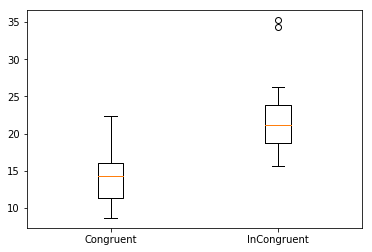

In [18]:
plotboxcharts(stroopcongruent,stroopincongruent)

The distribution of the sample data can be better visualized with the boxplot shown above. Based on the box plot, the response time of the task under incongruent words condition appears to be longer than that of the congruent words condition, which is consistent with the sample statistics generated earlier. Also,the distribution of the sample data from the Incongruent group is likely to be positively skewed due to two outliners(Row no 17 and Row no 22)

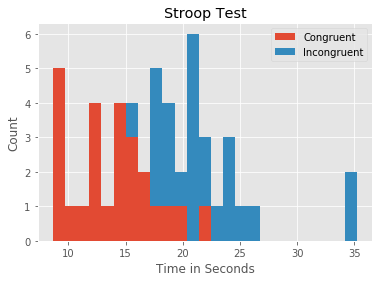

In [20]:
plt.style.use('ggplot')
df = pd.DataFrame({'Congruent':stroopcongruent, 'Incongruent': stroopincongruent},
                   columns=['Congruent', 'Incongruent'])
plt.figure();
df.plot.hist(title="Stroop Data", stacked="false", bins = 25);
plt.ylabel('Count')
plt.xlabel('Time in Seconds')
plt.title('Stroop Test')
plt.show()

The histogram clearly shows that the incongruent data has got some outliers around response time of 35 seconds. Also the histogram shows that the congruent data is read faster than the non-congruent data. 